# **Analyse des commandes Moveek**

## **Objectif**: Identifier les facteurs influençant les retards de livraison 

## **1.Préparation des données**

In [1]:
# Importation des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Lecture du fichier CSV
moveek = pd.read_csv("Moveek.csv", encoding="ISO-8859-1")

moveek.head(10)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class
5,TRANSFER,6,4,18.580000,294.980011,Shipping canceled,0,73,Sporting Goods,Tonawanda,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/19/2018 11:03,Standard Class
6,DEBIT,2,1,95.180000,288.420013,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 10:42,First Class
7,TRANSFER,2,1,68.430000,285.140015,Late delivery,1,73,Sporting Goods,Miami,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 10:21,First Class
8,CASH,3,2,133.720001,278.589996,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 10:00,Second Class
9,CASH,2,1,132.149994,275.309998,Late delivery,1,73,Sporting Goods,San Ramon,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 9:39,First Class


In [3]:
#Visualiser les dimensions du dataframe
moveek.shape

(180519, 53)

In [4]:
# Affichage des noms de colonnes 
moveek.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [5]:
#Sélection des colonnes pertinentes pour l'analyse 
cols = ["Type","Days for shipping (real)","Days for shipment (scheduled)","Benefit per order","Delivery Status",
        "Category Name","Customer Id","Customer Segment","Customer City","Latitude","Longitude","Order Country",
        "order date (DateOrders)","Order Id","Order Item Quantity","Order Item Profit Ratio","Order Item Total","Order Region","Order State",
        "Product Price","shipping date (DateOrders)","Shipping Mode"]



In [6]:
#Filtrer le dataframe avec les colonnes à conserver
moveek= moveek[cols]

moveek.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Delivery Status', 'Category Name', 'Customer Id',
       'Customer Segment', 'Customer City', 'Latitude', 'Longitude',
       'Order Country', 'order date (DateOrders)', 'Order Id',
       'Order Item Quantity', 'Order Item Profit Ratio', 'Order Item Total',
       'Order Region', 'Order State', 'Product Price',
       'shipping date (DateOrders)', 'Shipping Mode'],
      dtype='object')

In [7]:
# Modifier le type des colonnes de date au format datetime
moveek["order date (DateOrders)"] = pd.to_datetime(moveek["order date (DateOrders)"])
moveek["shipping date (DateOrders)"] = pd.to_datetime(moveek["shipping date (DateOrders)"])

In [8]:
# Création d'une colonne diff_days : nombre de jours d'écart entre la date de livraison prévue et date réelle
moveek["diff_days"] = moveek["Days for shipment (scheduled)"] - moveek["Days for shipping (real)"]

# Création d'une colonne process_days : nombre de jours de traitement de la commande avant expédition
moveek["process_days"] = (moveek["shipping date (DateOrders)"] - moveek["order date (DateOrders)"]).dt.days

## **2.Nettoyage des données**

In [9]:
#Vérifier les types de colonnes
moveek.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180519 non-null  object        
 1   Days for shipping (real)       180519 non-null  int64         
 2   Days for shipment (scheduled)  180519 non-null  int64         
 3   Benefit per order              180519 non-null  float64       
 4   Delivery Status                180519 non-null  object        
 5   Category Name                  180519 non-null  object        
 6   Customer Id                    180519 non-null  int64         
 7   Customer Segment               180519 non-null  object        
 8   Customer City                  180519 non-null  object        
 9   Latitude                       180519 non-null  float64       
 10  Longitude                      180519 non-null  float64       
 11  

Les formats sont corrects

In [10]:
# Vérifier les doublons 
moveek[moveek.duplicated()]

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Delivery Status,Category Name,Customer Id,Customer Segment,Customer City,Latitude,...,Order Item Quantity,Order Item Profit Ratio,Order Item Total,Order Region,Order State,Product Price,shipping date (DateOrders),Shipping Mode,diff_days,process_days


Le dataframe ne contient pas de doublons

In [11]:
#Vérifier les valeurs manquantes 
moveek.isnull().sum()

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Delivery Status                  0
Category Name                    0
Customer Id                      0
Customer Segment                 0
Customer City                    0
Latitude                         0
Longitude                        0
Order Country                    0
order date (DateOrders)          0
Order Id                         0
Order Item Quantity              0
Order Item Profit Ratio          0
Order Item Total                 0
Order Region                     0
Order State                      0
Product Price                    0
shipping date (DateOrders)       0
Shipping Mode                    0
diff_days                        0
process_days                     0
dtype: int64

Il n'y a pas de valeurs manquantes non plus 

In [12]:
#Renomer les colonnes 
moveek.rename(columns={"Type":"payment_type",
               "Days for shipping (real)":"shipping_days_real",
               "Days for shipment (scheduled)":"shipment_days_scheduled",
               "Order Item Total": "price_paid",
               "Order Item Profit Ratio":"profit_ratio",
               "Order Item Quantity": "quantity_ordered",
               "order date (DateOrders)":"order_date",
               "shipping date (DateOrders)":"shipping_date"}, inplace=True
             )

In [13]:
#Uniformiser les noms des colonnes
moveek.columns = moveek.columns.str.strip().str.lower().str.replace(" ", "_")

moveek.head()

,payment_type,shipping_days_real,shipment_days_scheduled,benefit_per_order,delivery_status,category_name,customer_id,customer_segment,customer_city,latitude,...,quantity_ordered,profit_ratio,price_paid,order_region,order_state,product_price,shipping_date,shipping_mode,diff_days,process_days
0,DEBIT,3,4,91.250000,Advance shipping,Sporting Goods,20755,Consumer,Caguas,18.251453,...,1,0.29,314.640015,Southeast Asia,Java Occidental,327.75,2018-02-03 22:56:00,Standard Class,1,3
1,TRANSFER,5,4,-249.089996,Late delivery,Sporting Goods,19492,Consumer,Caguas,18.279451,...,1,-0.80,311.359985,South Asia,Rajastán,327.75,2018-01-18 12:27:00,Standard Class,-1,5
2,CASH,4,4,-247.779999,Shipping on time,Sporting Goods,19491,Consumer,San Jose,37.292233,...,1,-0.80,309.720001,South Asia,Rajastán,327.75,2018-01-17 12:06:00,Standard Class,0,4
3,DEBIT,3,4,22.860001,Advance shipping,Sporting Goods,19490,Home Office,Los Angeles,34.125946,...,1,0.08,304.809998,Oceania,Queensland,327.75,2018-01-16 11:45:00,Standard Class,1,3
4,PAYMENT,2,4,134.210007,Advance shipping,Sporting Goods,19489,Corporate,Caguas,18.253769,...,1,0.45,298.250000,Oceania,Queensland,327.75,2018-01-15 11:24:00,Standard Class,2,2


In [14]:
# Analyse statistique des données 
moveek.describe()

,shipping_days_real,shipment_days_scheduled,benefit_per_order,customer_id,latitude,longitude,order_date,order_id,quantity_ordered,profit_ratio,price_paid,product_price,shipping_date,diff_days,process_days
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519,180519.000000,180519.000000
mean,3.497654,2.931847,21.974989,6691.379495,29.719955,-84.915675,2016-06-12 17:47:04.669868544,36221.894903,2.127638,0.120647,183.107609,141.232550,2016-06-16 05:45:23.202433024,-0.565807,3.471856
min,0.000000,0.000000,-4274.979980,1.000000,-33.937553,-158.025986,2015-01-01 00:00:00,1.000000,1.000000,-2.750000,7.490000,9.990000,2015-01-03 00:00:00,-4.000000,0.000000
25%,2.000000,2.000000,7.000000,3258.500000,18.265432,-98.446312,2015-09-21 13:49:00,18057.000000,1.000000,0.080000,104.379997,50.000000,2015-09-25 06:59:00,-1.000000,2.000000
50%,3.000000,4.000000,31.520000,6457.000000,33.144863,-76.847908,2016-06-11 13:06:00,36140.000000,1.000000,0.270000,163.990005,59.990002,2016-06-15 08:32:00,-1.000000,3.000000
75%,5.000000,4.000000,64.800003,9779.000000,39.279617,-66.370583,2017-03-01 08:42:00,54144.000000,3.000000,0.360000,247.399994,199.990005,2017-03-04 21:29:00,0.000000,5.000000
max,6.000000,4.000000,911.799988,20757.000000,48.781933,115.263077,2018-01-31 23:38:00,77204.000000,5.000000,0.500000,1939.989990,1999.989990,2018-02-06 22:14:00,2.000000,6.000000
std,1.623722,1.374449,104.433526,4162.918106,9.813646,21.433241,NaN,21045.379569,1.453451,0.466796,120.043670,139.732492,NaN,1.490966,1.670471


Les données semblent cohérentes, excepté pour la valeur minimale de la variable 'benefit per order' probablement une valeur aberrante.\
On observe que certaines variables peuvent contenir des outliers, les valeurs minimales ou maximales sont assez éloignées par rapport à la moyenne.\
les colonnes concernées sont:\
benefice_per_order,\
price_paid,\
product_price

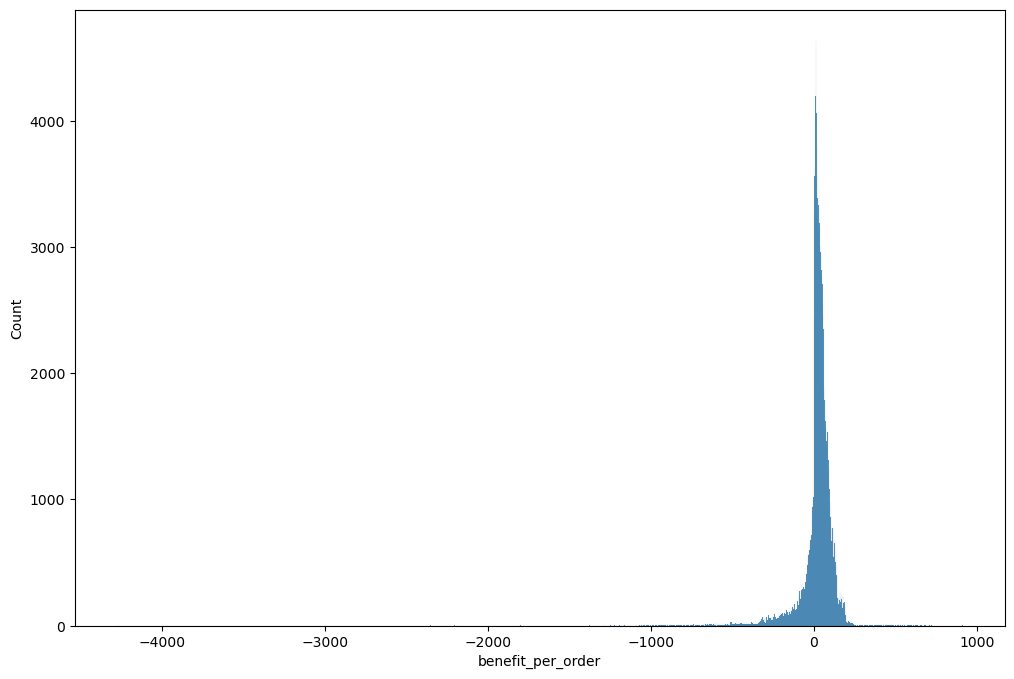

In [17]:
# Visualiser la distribution de la variable 'Benefice per order'
plt.figure(figsize=(12,8))
sns.histplot(data = moveek, x="benefit_per_order")
plt.show()

On observe de nombreux bénéfices négatifs et assez conséquents jusqu'à -4000 dollars

In [20]:
# Créer une nouvelle variable 'Profit_per order' à l'aide du montant net (price_paid) et de la marge nette (Profit ratio)
moveek["profit_per_order"] = moveek["price_paid"] * moveek["profit_ratio"]
moveek.head()

,payment_type,shipping_days_real,shipment_days_scheduled,benefit_per_order,delivery_status,category_name,customer_id,customer_segment,customer_city,latitude,...,profit_ratio,price_paid,order_region,order_state,product_price,shipping_date,shipping_mode,diff_days,process_days,profit_per_order
0,DEBIT,3,4,91.250000,Advance shipping,Sporting Goods,20755,Consumer,Caguas,18.251453,...,0.29,314.640015,Southeast Asia,Java Occidental,327.75,2018-02-03 22:56:00,Standard Class,1,3,91.245602
1,TRANSFER,5,4,-249.089996,Late delivery,Sporting Goods,19492,Consumer,Caguas,18.279451,...,-0.80,311.359985,South Asia,Rajastán,327.75,2018-01-18 12:27:00,Standard Class,-1,5,-249.087992
2,CASH,4,4,-247.779999,Shipping on time,Sporting Goods,19491,Consumer,San Jose,37.292233,...,-0.80,309.720001,South Asia,Rajastán,327.75,2018-01-17 12:06:00,Standard Class,0,4,-247.776005
3,DEBIT,3,4,22.860001,Advance shipping,Sporting Goods,19490,Home Office,Los Angeles,34.125946,...,0.08,304.809998,Oceania,Queensland,327.75,2018-01-16 11:45:00,Standard Class,1,3,24.384799
4,PAYMENT,2,4,134.210007,Advance shipping,Sporting Goods,19489,Corporate,Caguas,18.253769,...,0.45,298.250000,Oceania,Queensland,327.75,2018-01-15 11:24:00,Standard Class,2,2,134.212496


In [22]:
# Créer une colonne permettant d'iddentifier les incohérences entre la variable "benefice_per_order" et "profit_per_order"

moveek["profit_error"] = moveek["benefit_per_order"] != moveek["profit_per_order"]

# Vérifier s'il y des erreurs 
moveek["profit_error"].value_counts()

profit_error
True     177793
False      2726
Name: count, dtype: int64

De nombreuses erreurs dans la variable "benefit_per_order" (177793)

In [23]:
# Suppression des colonnes "benefit_per_order" et "profit_error"

moveek.drop(["benefit_per_order", "profit_error"], axis=1, inplace=True)

In [24]:
#Sauvegarde du fichier nettoyé pour l'analyse 
moveek.to_csv("Moveek_cln.csv", index=False)